In [2]:
import yfinance as yf
import mplfinance as mpf
from datetime import datetime
import pandas as pd
from dateutil.relativedelta import relativedelta
from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt

portfoliodict = {
    "aapl": 0.4,
    "nke": 0.1,
    "cdns": 0.3,
    "dxcm": 0.2
}

tickers = list(portfoliodict.keys())

weights = list(portfoliodict.values())

class Company:
    def __init__(self, ticker, weight):
        self.ticker = ticker
        self.weight = weight
    
    def make_company(self, start, end = datetime.now(), interval = '1d'):
        self.data = yf.download(self.ticker, start, end, interval)
        if isinstance(self.data.columns, pd.MultiIndex):
            self.data.columns = self.data.columns.get_level_values(0)
        self.data.reset_index(names='Date', inplace = True)
        self.data['Daily Returns'] = self.data['Close'].pct_change()


class Market:
    def __init__(self, ticker):
        self.ticker = ticker

    def make_market(self, start, end = datetime.now(), interval = '1d'):
        self.data = yf.download(self.ticker, start, end, interval)
        if isinstance(self.data.columns, pd.MultiIndex):
            self.data.columns = self.data.columns.get_level_values(0)
        self.data.reset_index(names='Date', inplace = True)
        self.data['Daily Returns'] = self.data['Close'].pct_change()

companies = []

def make_companies(tickers, start, weights):
    i = 0
    for ticker in tickers:
        company = Company(ticker, weights[i])
        company.make_company(start)
        companies.append(company)
        i += 1

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Ticker          AAPL      AMZN      META     GOOGL      MSFT  Portfolio
Date                                                                   
2023-01-04  0.010314 -0.007924  0.021084 -0.011670 -0.043743  -0.006388
2023-01-05 -0.010605 -0.023726 -0.003376 -0.021344 -0.029638  -0.017738
2023-01-06  0.036794  0.035611  0.024263  0.013225  0.011785   0.024336
2023-01-09  0.004089  0.014870 -0.004230  0.007786  0.009736   0.006450
2023-01-10  0.004456  0.028732  0.027188  0.004544  0.007617   0.014508


<Axes: xlabel='Ticker'>

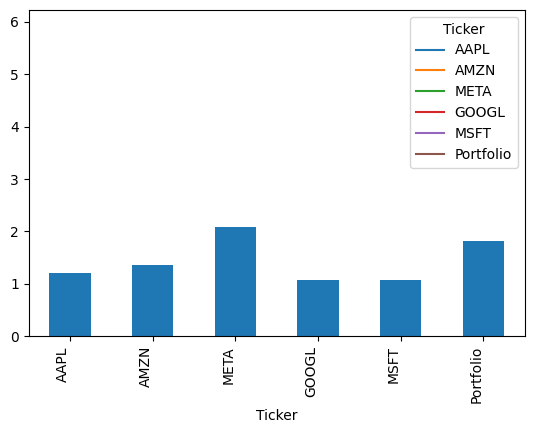

In [3]:

# Sharpe Ratio Calc

# calculated by the (return of the portfolio - the risk free rate) divided by std of the portfolios excess return
# basically compares the returns you get on the investment minus the return you would have gotten from the risk free rate,
# or the rate the government would tell you, and then divide by a quantified measure of how much risk you are taking
# to get the extra return as compared with the risk free rate

# the risk is sigma and is calculated by summing all the returns over given periods, and then dividng by the periods and stuff


portfolio = {
    'AAPl': 0.2,
    'AMZN': 0.2,
    'META': 0.2,
    'GOOGL': 0.2,
    'MSFT': 0.2
}

stock_data = [yf.download(ticker, '2023-01-01', datetime.now(), '1d')['Close'] for ticker in list(portfolio.keys())]

df = pd.concat(stock_data, axis=1).pct_change().dropna()

df['Portfolio'] = df.mean(axis = 1)

(df + 1).cumprod().plot()

# add one to each percent change, then multiply all of them in order to get the total percent change

(df + 1).cumprod()[-1:]

print(df.head())

def sharpe(return_series, N, rf): # N is the number of trading periods in a year, which is 255 for daily returns.
    #  the return series is just the percent change in returns i think
    # the rf is the risk free rate

    mean = return_series.mean() * N - rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 255
rf = 0.01

sharpes = df.apply(sharpe, args = (N,rf), axis = 0) # the .apply method lets you apply a function an entire row or 
# column of a DataFrame,

sharpes.plot.bar()
